/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


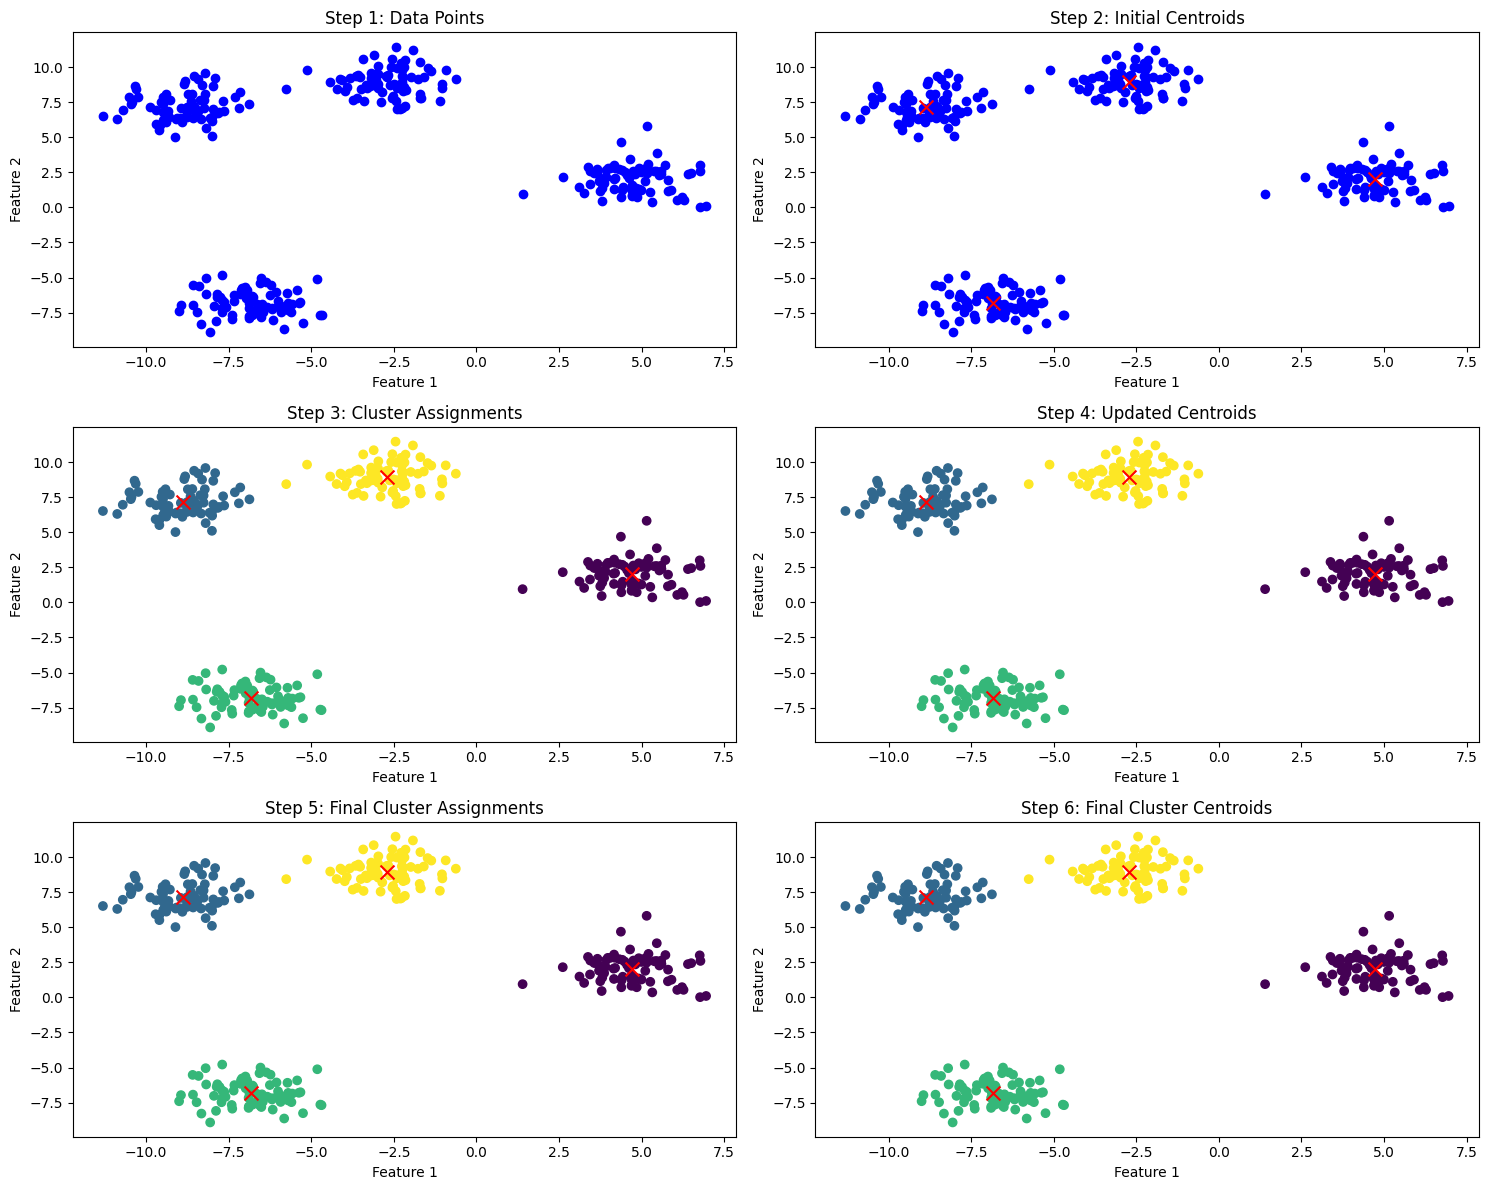

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

# Generate synthetic data (you can replace this with your own dataset)
data, _ = make_blobs(n_samples=300, centers=4, random_state=42)

# Step 1: Choose the number of clusters (K) and initialize centroids
n_clusters = 4
kmeans = KMeans(n_clusters=n_clusters, random_state=42, init='k-means++')  # Using K-Means++ initialization

# Step 2: Assign each data point to the nearest centroid
cluster_labels = kmeans.fit_predict(data)

# Step 3: Update centroids as the mean of data points in each cluster
cluster_centers = kmeans.cluster_centers_

# Step 4: Iterate until convergence (or a maximum number of iterations)
max_iterations = 100
for _ in range(max_iterations):
    prev_centers = cluster_centers.copy()  # Store previous centroids for convergence check
    cluster_labels = kmeans.fit_predict(data)
    cluster_centers = kmeans.cluster_centers_
    if np.all(prev_centers == cluster_centers):
        break

# Step 5: Final Result - Cluster assignments and centroids
final_cluster_assignments = cluster_labels
final_cluster_centroids = cluster_centers

# Plot each step separately
plt.figure(figsize=(15, 12))

# Step 1: Data Points
plt.subplot(3, 2, 1)
plt.scatter(data[:, 0], data[:, 1], c='b', marker='o')
plt.title('Step 1: Data Points')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

# Step 2: Initial Centroids
plt.subplot(3, 2, 2)
plt.scatter(data[:, 0], data[:, 1], c='b', marker='o')
plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], c='red', marker='x', s=100)
plt.title('Step 2: Initial Centroids')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

# Step 3: Cluster Assignments
plt.subplot(3, 2, 3)
plt.scatter(data[:, 0], data[:, 1], c=cluster_labels, cmap='viridis')
plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], c='red', marker='x', s=100)
plt.title('Step 3: Cluster Assignments')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

# Step 4: Updated Centroids
plt.subplot(3, 2, 4)
plt.scatter(data[:, 0], data[:, 1], c=cluster_labels, cmap='viridis')
plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], c='red', marker='x', s=100)
plt.title('Step 4: Updated Centroids')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

# Step 5: Final Cluster Assignments
plt.subplot(3, 2, 5)
plt.scatter(data[:, 0], data[:, 1], c=final_cluster_assignments, cmap='viridis')
plt.scatter(final_cluster_centroids[:, 0], final_cluster_centroids[:, 1], c='red', marker='x', s=100)
plt.title('Step 5: Final Cluster Assignments')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

# Step 6: Final Cluster Centroids
plt.subplot(3, 2, 6)
plt.scatter(data[:, 0], data[:, 1], c=final_cluster_assignments, cmap='viridis')
plt.scatter(final_cluster_centroids[:, 0], final_cluster_centroids[:, 1], c='red', marker='x', s=100)
plt.title('Step 6: Final Cluster Centroids')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

plt.tight_layout()
plt.show()



Mean Vector:
[3.8 4.8]

Covariance Matrix:
[[5.7 5.7]
 [5.7 5.7]]

Eigenvalues:
[11.4  0. ]

Eigenvectors:
[[ 0.70710678 -0.70710678]
 [ 0.70710678  0.70710678]]


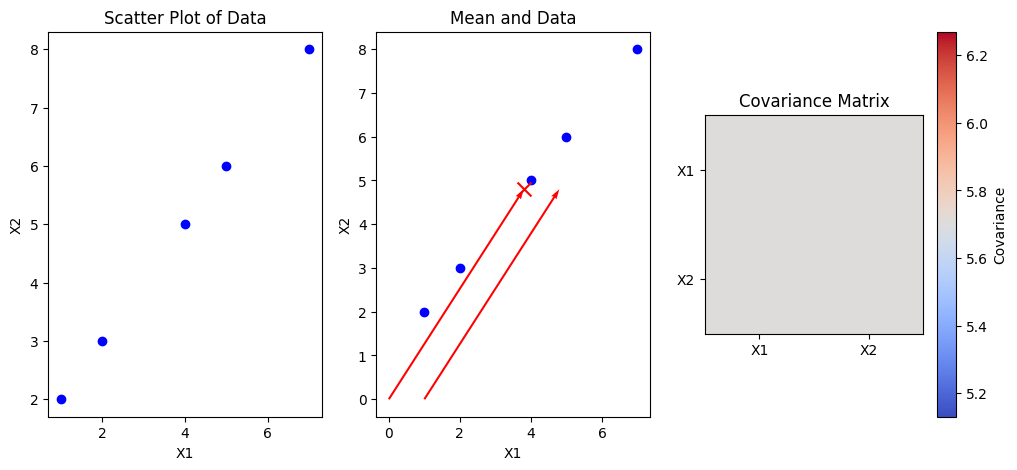

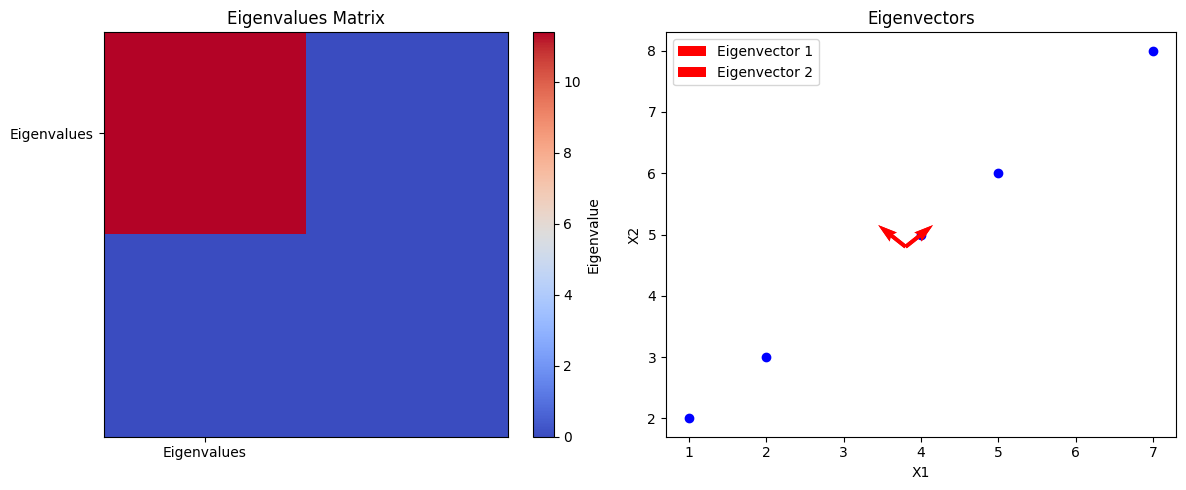

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Sample data (replace with your own dataset)
data = np.array([[1, 2], [4, 5], [7, 8], [2, 3], [5, 6]])

# Step 1: Compute the mean (average) of the data
mean_vector = np.mean(data, axis=0)

# Step 2: Compute the covariance matrix
cov_matrix = np.cov(data, rowvar=False)

# Visualize the mean and covariance matrix
plt.figure(figsize=(12, 5))

# Scatter plot of the data
plt.subplot(131)
plt.scatter(data[:, 0], data[:, 1], c='b', marker='o')
plt.title('Scatter Plot of Data')
plt.xlabel('X1')
plt.ylabel('X2')

# Mean vector
mean_vector_matrix = np.outer(mean_vector, np.ones_like(mean_vector))

# Plot mean vector
plt.subplot(132)
plt.scatter(data[:, 0], data[:, 1], c='b', marker='o')
plt.scatter(mean_vector[0], mean_vector[1], c='r', marker='x', s=100, label='Mean')
plt.quiver(*mean_vector_matrix, angles='xy', scale_units='xy', scale=1, color='r')
plt.title('Mean and Data')
plt.xlabel('X1')
plt.ylabel('X2')

# Plot covariance matrix as a heatmap
plt.subplot(133)
plt.imshow(cov_matrix, cmap='coolwarm', interpolation='nearest')
plt.colorbar(label='Covariance')
plt.title('Covariance Matrix')
plt.xticks([0, 1], ['X1', 'X2'])
plt.yticks([0, 1], ['X1', 'X2'])

# Step 3: Compute the eigenvalues and eigenvectors of the covariance matrix
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

# Step 4: Sort eigenvalues and eigenvectors in descending order
sorted_indices = np.argsort(eigenvalues)[::-1]
eigenvalues = eigenvalues[sorted_indices]
eigenvectors = eigenvectors[:, sorted_indices]

# Visualize eigenvalues and eigenvectors
plt.figure(figsize=(12, 5))

# Plot eigenvalues as a diagonal matrix
eigenvalues_matrix = np.diag(eigenvalues)

# Print the results
print("Mean Vector:")
print(mean_vector)

print("\nCovariance Matrix:")
print(cov_matrix)

print("\nEigenvalues:")
print(eigenvalues)

print("\nEigenvectors:")
print(eigenvectors)

# Plot eigenvalues matrix
plt.subplot(121)
plt.imshow(eigenvalues_matrix, cmap='coolwarm', interpolation='nearest')
plt.colorbar(label='Eigenvalue')
plt.title('Eigenvalues Matrix')
plt.xticks([0], ['Eigenvalues'])
plt.yticks([0], ['Eigenvalues'])

# Plot eigenvectors matrix
plt.subplot(122)
plt.scatter(data[:, 0], data[:, 1], c='b', marker='o')
for i in range(len(eigenvectors)):
    plt.quiver(*mean_vector_matrix, eigenvectors[0, i], eigenvectors[1, i],
               angles='xy', scale_units='xy', scale=2, color='r', label=f'Eigenvector {i+1}')
plt.title('Eigenvectors')
plt.xlabel('X1')
plt.ylabel('X2')
plt.legend()

plt.tight_layout()
plt.show()


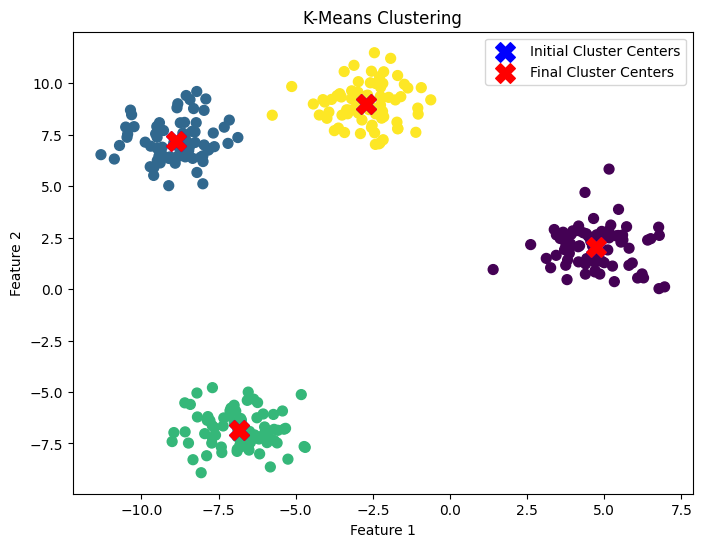

Initial Cluster Centers:
[[ 4.7182049   2.04179676]
 [-8.87357218  7.17458342]
 [-6.83235205 -6.83045748]
 [-2.70981136  8.97143336]]

Final Cluster Centers after 10 iterations:
[[ 4.7182049   2.04179676]
 [-8.87357218  7.17458342]
 [-6.83235205 -6.83045748]
 [-2.70981136  8.97143336]]


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

# Generate synthetic data (you can replace this with your own data)
data, _ = make_blobs(n_samples=300, centers=4, random_state=42)

# Create a K-Means model with the desired number of clusters (e.g., 4 clusters)
n_clusters = 4
kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)  # Explicitly set n_init to 10

# Fit the model to the data
kmeans.fit(data)

# Get cluster labels and cluster centers
cluster_labels = kmeans.labels_
initial_cluster_centers = kmeans.cluster_centers_

# Number of iterations for clustering
num_iterations = 10  # You can change this number as needed

# Perform clustering for a certain number of iterations
for _ in range(num_iterations):
    kmeans.fit(data)
    cluster_labels = kmeans.labels_
    final_cluster_centers = kmeans.cluster_centers_

# Plot the data points colored by their cluster labels and cluster centers
plt.figure(figsize=(8, 6))

# Plot data points
plt.scatter(data[:, 0], data[:, 1], c=cluster_labels, cmap='viridis', s=50)

# Plot initial cluster centers in blue
plt.scatter(initial_cluster_centers[:, 0], initial_cluster_centers[:, 1], c='blue', marker='X', s=200, label='Initial Cluster Centers')

# Plot final cluster centers in red
plt.scatter(final_cluster_centers[:, 0], final_cluster_centers[:, 1], c='red', marker='X', s=200, label='Final Cluster Centers')

plt.title('K-Means Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()

# Print the initial and final cluster centers
print("Initial Cluster Centers:")
print(initial_cluster_centers)

print("\nFinal Cluster Centers after", num_iterations, "iterations:")
print(final_cluster_centers)
